In [1]:
from filtered_pearson import FilteredPearson
import numpy as np
from scipy.stats import pearsonr

## Goal

The goal is to identify if there's a strong outlier in the pair of input vectors x, y and to remove it. We defined a threshold tresh such that if you remove the outlier, the Pearson score must improve by at least this threshold. 

In [2]:
# let's define two arrays with one outlier
x = np.array([1, 2, 3, 4, 5, 1]) / 100
y = np.array([1, 2, 3, 4, 5, 6]) / 100

print(f"The Pearson correlation coefficient is {np.round(pearsonr(x, y)[0], 4)}.\nThe filtered Pearson correlation coefficient is {FilteredPearson(x, y, thresh=0.5)[0]}")

The Pearson correlation coefficient is 0.3273.
The filtered Pearson correlation coefficient is 1.0


## How does that work

### Step 1: identify the potential outliers

Text(0.5, 1.0, 'Identifying outliers with two lines')

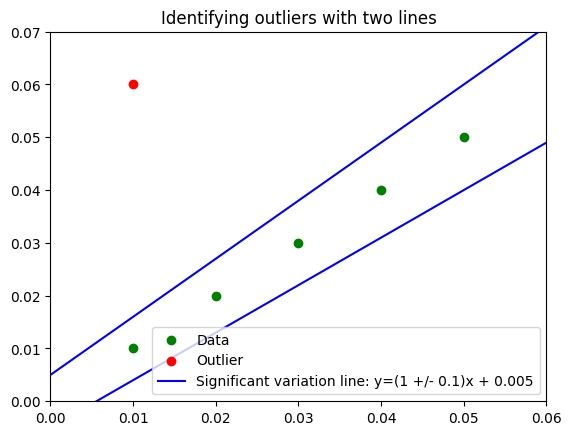

In [20]:
import matplotlib.pyplot as plt

plt.scatter(x[:-1], y[:-1], color='g')
plt.scatter(x[-1], y[-1], color='r')
plt.xlim(0, 6/100)
plt.ylim(0, 7/100)

t = np.linspace(0, 6/100, 10)
plt.plot(t, t + FilteredPearson.significant_variation_line(t), color = 'b')
plt.plot(t, t - FilteredPearson.significant_variation_line(t), color = 'b')

plt.legend(['Data', "Outlier", "Significant variation line: y=(1 +/- 0.1)x + 0.005"], loc='lower right')
plt.title("Identifying outliers with two lines")


### Step 2: compute the Pearson correlation with and without the outlier

In [13]:
print("Pearson with outlier: {:.3f}".format(score_with_outlier:=pearsonr(x, y)[0]))
print("Pearson without outlier: {:.3f}".format(score_without_outlier:=pearsonr(x[:-1], y[:-1])[0]))

Pearson with outlier: 0.327
Pearson without outlier: 1.000


### Step 3: if the difference between the filtered is more than threshold, return the filtered data score

In [15]:
threshold = 0.5


Score with outlier is significant:  True
